<a href="https://colab.research.google.com/github/youngmook/aihub/blob/main/Drought_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install prophet

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

from lightgbm import LGBMRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error

import pandas as pd
from prophet import Prophet

In [11]:
URL = "https://www.drought.kr/data/train_sgi_130_61552.y.csv"
open('train_sgi_130_61552.csv', 'wb').write(requests.get(URL).content)

df = pd.read_csv('./train_sgi_130_61552.csv')


In [12]:
df.head()

,ds,y
0,2019-12-02,32.044
1,2019-12-03,32.004
2,2019-12-04,32.004
3,2019-12-05,31.981
4,2019-12-06,31.949


In [13]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoum9qviz/khxys3y1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoum9qviz/igjr8t_a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38148', 'data', 'file=/tmp/tmpoum9qviz/khxys3y1.json', 'init=/tmp/tmpoum9qviz/igjr8t_a.json', 'output', 'file=/tmp/tmpoum9qviz/prophet_modelp16vqo0s/prophet_model-20240319214118.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:41:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:41:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)

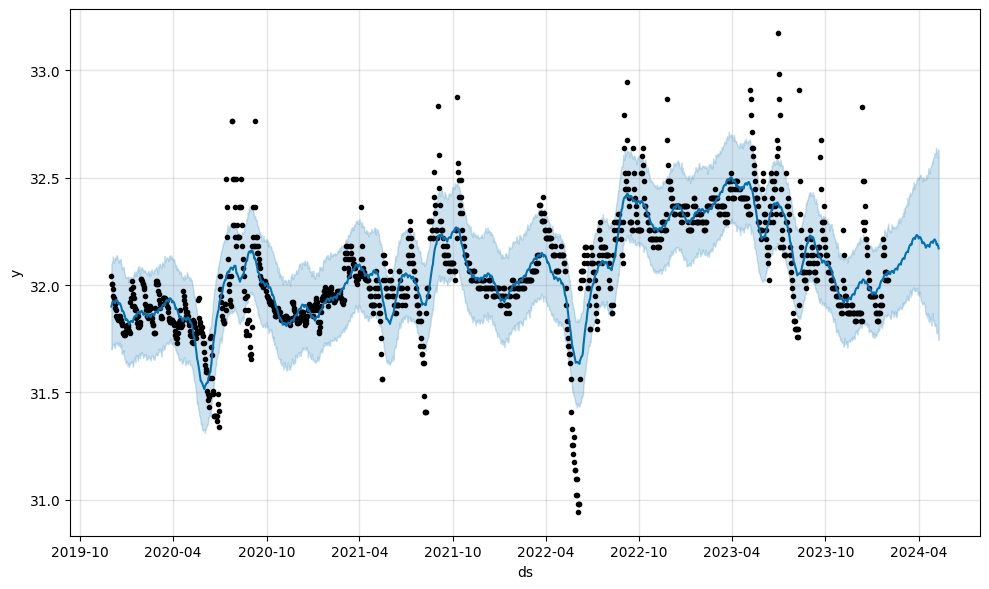

In [29]:
fig1 = m.plot(forecast)
